In [3]:
import ast 
import pandas as pd 
import matplotlib.pyplot as plt 

data = pd.read_csv(r"C:\Users\Lenovo\OneDrive\Documents\Projects\Luke Barousse Projects\Python Course  Data Analysis\data_jobs.csv")
df=data
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)




In [1]:
import seaborn as sns 

In [4]:
#Only get data analyst jobs in US
df_DA_US = df[(df['job_title_short']=="Data Analyst") & (df['job_country']=='United States')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization 
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

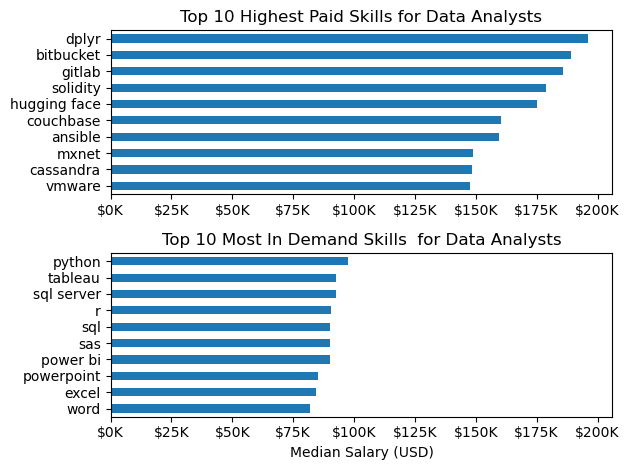

In [5]:

df_DA_US = df_DA_US.explode('job_skills')

df_DA_US_group = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count','median'])
df_DA_top_pay = df_DA_US_group.sort_values(by='median',ascending=False).head(10)
df_DA_skills = df_DA_US_group.sort_values(by='count',ascending=False).head(10).sort_values(by='median',ascending=False)

fig,ax=plt.subplots(2,1)

#Top 10 Highest paid skill for Data Analysis 
df_DA_top_pay[::-1].plot(kind='barh' , y='median' , ax=ax[0],legend=False)
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'${int(x/1000)}K'))

#Top 10 Most In-Demand skills for Data Analysis 
df_DA_skills[::-1].plot(kind='barh',y='median' , ax=ax[1],legend=False)
ax[1].set_title('Top 10 Most In Demand Skills  for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'${int(x/1000)}K'))

fig.tight_layout()





BAR PLOT

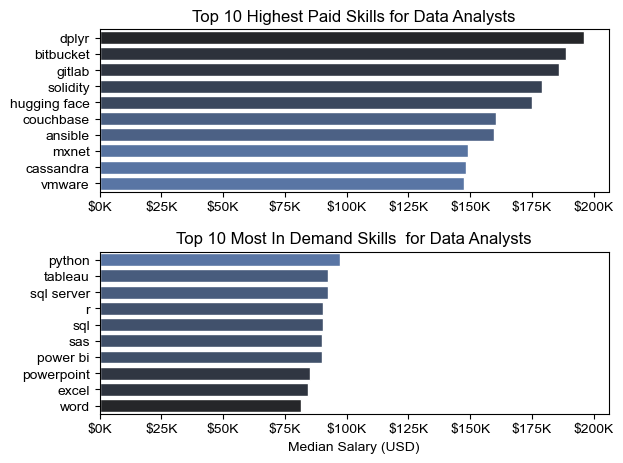

In [14]:
fig,ax=plt.subplots(2,1)

sns.set_theme(style='ticks')

#Top 10 Highest paid skill for Data Analysis 
sns.barplot(data=df_DA_top_pay,x='median',y=df_DA_top_pay.index,ax=ax[0],hue='median',palette='dark:b_r')
ax[0].legend().remove()
# df_DA_top_pay[::-1].plot(kind='barh' , y='median' , ax=ax[0],legend=False)
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'${int(x/1000)}K'))

#Top 10 Most In-Demand skills for Data Analysis 

sns.barplot(data=df_DA_skills,x='median',y=df_DA_skills.index,ax=ax[1],hue='median',palette='dark:b')
ax[1].legend().remove()
# df_DA_skills[::-1].plot(kind='barh',y='median' , ax=ax[1],legend=False)
ax[1].set_title('Top 10 Most In Demand Skills  for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'${int(x/1000)}K'))

fig.tight_layout()



HISTOGRAM


Text(0, 0.5, 'Number of Jobs')

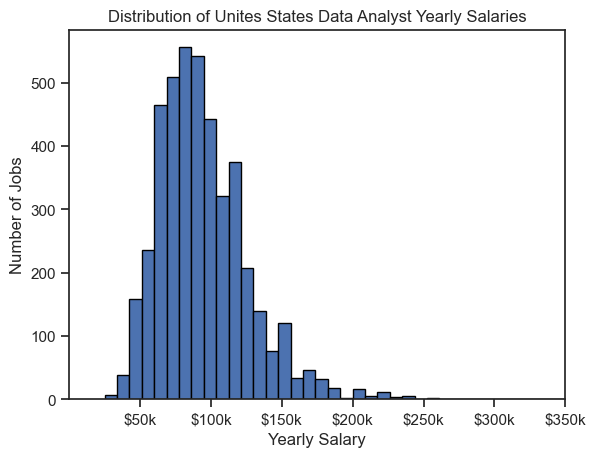

In [18]:
df_DA_US = df[(df['job_title_short'] == "Data Analyst") & (df['job_country']=="United States")].copy()

df_DA_US['salary_year_avg'].plot(kind='hist',bins=40,edgecolor='black')
plt.xlim(50,350000)

ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos:f'${int(y/1000)}k' ))

plt.title("Distribution of Unites States Data Analyst Yearly Salaries")
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')

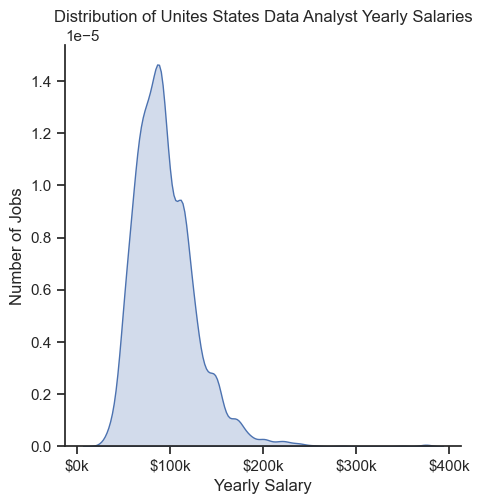

In [21]:


sns.displot(df_DA_US['salary_year_avg'],kind='kde',fill=True)
plt.title("Distribution of Unites States Data Analyst Yearly Salaries")
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')
ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos:f'${int(y/1000)}k' ))
plt.show()

BOXPLOT

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2440\2684655100.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


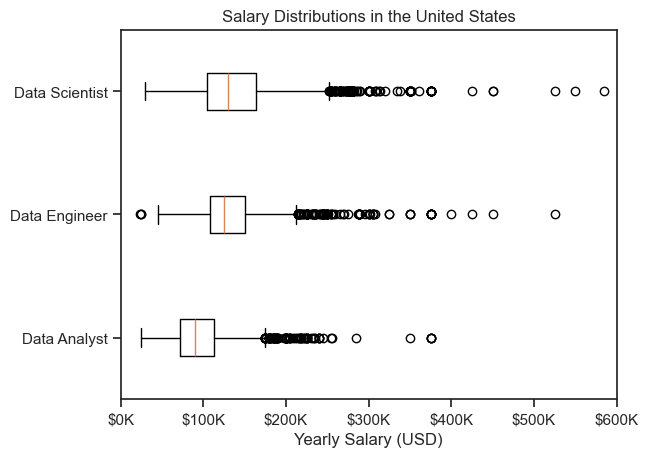

In [22]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

# filter for the job titles and country
df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].dropna(subset=['salary_year_avg'])

# list of salaries for each job title
job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title('Salary Distributions in the United States')
plt.xlabel('Yearly Salary (USD)')
plt.xlim(0, 600000)
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()


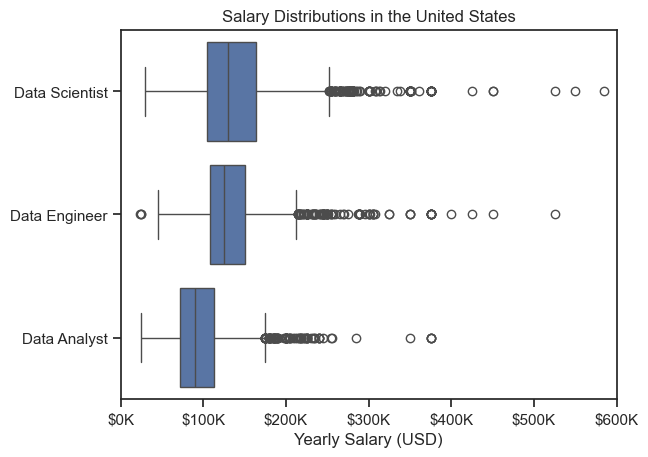

In [25]:

sns.boxplot(data=df_US,x='salary_year_avg',y='job_title_short')
plt.title('Salary Distributions in the United States')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 600000)
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()